In [24]:
#Loading the data
import pandas as pd
import os
import numpy as np

# Load the data
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_150.csv')
data = pd.read_csv(input_csv_path)

data['distance_x'] = 10.0 - data['distance_x']


# Fill missing 'distance_x' with the previous value
data['distance_x'] = data['distance_x'].fillna(method='ffill')

# Fill missing 'value' with 0
data['value'] = data['value'].fillna(0)


# Recalculate error rates with absolute distances
data['is_error'] = data['value'].apply(lambda x: 1 if x not in [0, 1, 2, 3] else 0)

# Specified relative distances
specified_distances = np.array([5, 8, 11, 14, 17, 20])

# Assigning each data point to the nearest specified distance
data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_x'].values).argmin(axis=0)]

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_150_processed.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path # Return the path to the new CSV and display the first few rows of the cleaned data.
data.head(5)




,timestamp,distance_x,value,is_error,nearest_distance
0,71.540,4.995761,0.0,0,5
1,71.552,4.995761,0.0,0,5
2,71.556,4.995761,3.0,0,5
3,71.560,4.995761,0.0,0,5
4,71.560,4.995761,2.0,0,5


In [18]:
#Loading the data
import pandas as pd
import os
import numpy as np
# Load the data
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_200_cleaned.csv')
data_static = pd.read_csv(input_csv_path)
data_static.head(5)

# Load the data of threshold 100
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_100_cleaned.csv')
data_static_100 = pd.read_csv(input_csv_path)
data_static_100.head(5)

# Load the data of threshold 150
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_150_processed.csv')
data_static_150 = pd.read_csv(input_csv_path)

# Load the data of threshold 50
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_50_processed.csv')
data_static_50 = pd.read_csv(input_csv_path)
data_static_50.head(5)

# Load the data of threshold 100 v2
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_100_v2_cleaned.csv')
data_static_100_v2 = pd.read_csv(input_csv_path)
data_static_100_v2.head(5)

# Load the data of threshold 100 v2
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_static_standard_th_100_v2_processed.csv')
data_static_100_v2 = pd.read_csv(input_csv_path)
data_static_100_v2.head(5)




,timestamp,distance_x,value,is_error,nearest_distance
0,202.952,NaN,2.0,0,5
1,202.956,4.99569,0.0,0,5
2,202.964,4.99569,2.0,0,5
3,202.964,4.99569,0.0,0,5
4,202.964,4.99569,2.0,0,5


In [4]:
# Load the data dynamic
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_200_cleaned.csv')
data_dynamic = pd.read_csv(input_csv_path)
data_dynamic.head(5)

# Load the data of threshold 100
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_100_cleaned.csv')
data_dynamic_100 = pd.read_csv(input_csv_path)

#Load the data of threshold 150
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_150_cleaned.csv')
data_dynamic_150 = pd.read_csv(input_csv_path)
data_dynamic_150.head(5)

# Load the data of threshold 50
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_50_cleaned.csv')
data_dynamic_50 = pd.read_csv(input_csv_path)
data_dynamic_50.head(5)

# Load the data of threshold 100 v2
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/dynamic_standard_th_100_v2_cleaned.csv')
data_dynamic_100_v2 = pd.read_csv(input_csv_path)
data_dynamic_100_v2.head(5)

,timestamp,distance_x,value,is_error,nearest_distance
0,60.980,4.996939,0.0,1,5
1,60.980,4.996939,2.0,0,5
2,60.988,4.996921,0.0,1,5
3,60.992,4.996921,2.0,0,5
4,60.996,4.996921,2.0,0,5


In [44]:
import numpy as np
# Summarizing the frequency of errors for threshold 200
th_200_summary_static = data_static.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_200_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,6150,3016,0.490407
1,8,6141,3036,0.494382
2,11,6163,2829,0.459030
3,14,6151,4916,0.799220
4,17,6142,5955,0.969554
5,20,6120,5997,0.979902


In [22]:
# Summarizing the frequency of errors for threshold 100 v2
th_100_v2_summary_static = data_static_100_v2.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_100_v2_summary_static


,nearest_distance,total_entries,total_errors,error_rate
0,5,6564,242,0.036868
1,8,6556,444,0.067724
2,11,6564,354,0.053931
3,14,6566,2651,0.403747
4,17,6562,3463,0.527735
5,20,6571,3381,0.514534


In [43]:
# Summarizing the frequency of errors for threshold 200
th_200_summary_dynamic = data_dynamic.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_200_summary_dynamic

,nearest_distance,total_entries,total_errors,error_rate
0,5,13218,6838,0.517325
1,8,7368,3789,0.514251
2,11,7369,3768,0.511331
3,14,7354,6301,0.856813
4,17,7362,7139,0.969709
5,20,7452,7393,0.992083


In [5]:
# Summarizing the frequency of errors for threshold 100 v2
th_100_v2_summary_static = data_static_100_v2.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_100_v2_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,6564,3224,0.491164
1,8,6556,3437,0.524253
2,11,6564,3346,0.509750
3,14,6566,5643,0.859427
4,17,6562,6450,0.982932
5,20,6571,6489,0.987521


In [42]:
#Summarizing the frequency of errors for threshold 100
th_100_summary_static = data_static_100.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_100_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,5971,143,0.023949
1,8,5993,148,0.024695
2,11,5999,49,0.008168
3,14,5974,2366,0.396050
4,17,5982,3515,0.587596
5,20,5980,3526,0.589632


In [24]:
#Summarizing the frequency of errors for threshold 100
th_100_summary_dynamic = data_dynamic_100.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_100_summary_dynamic

,nearest_distance,total_entries,total_errors,error_rate
0,5,10524,5093,0.483941
1,8,7374,3546,0.480879
2,11,7399,3539,0.478308
3,14,7379,6179,0.837376
4,17,7378,7261,0.984142
5,20,7425,7197,0.969293


In [34]:
#Summarizing the frequency of errors for threshold 150
th_150_summary_static = data_static_150.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_150_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,6077,2762,0.454501
1,8,6063,2883,0.475507
2,11,6060,2675,0.441419
3,14,6054,5182,0.855963
4,17,6049,5936,0.981319
5,20,6036,6036,1.000000


In [36]:
#Summarizing the frequency of errors for threshold 150
th_150_summary_dynamic = data_dynamic_150.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_150_summary_dynamic

,nearest_distance,total_entries,total_errors,error_rate
0,5,11730,5579,0.475618
1,8,6809,3146,0.462036
2,11,221,142,0.642534
3,14,12835,10630,0.828204
4,17,6812,6623,0.972255
5,20,6788,6464,0.952269


In [23]:
#Summarizing the frequency of errors for threshold 50
th_50_summary_static = data_static_50.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_50_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,5970,2682,0.449246
1,8,5952,2635,0.442708
2,11,5946,2592,0.435923
3,14,5981,2824,0.472162
4,17,5969,2855,0.478305
5,20,5991,2811,0.469204


In [51]:
#Summarizing the frequency of errors for threshold 50
th_50_summary_dynamic = data_dynamic_50.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})
th_50_summary_dynamic

,nearest_distance,total_entries,total_errors,error_rate
0,5,10527,10006,0.950508
1,8,6276,5966,0.950605
2,11,6082,5864,0.964157
3,14,6327,6223,0.983563
4,17,6151,6088,0.989758
5,20,6776,6756,0.997048


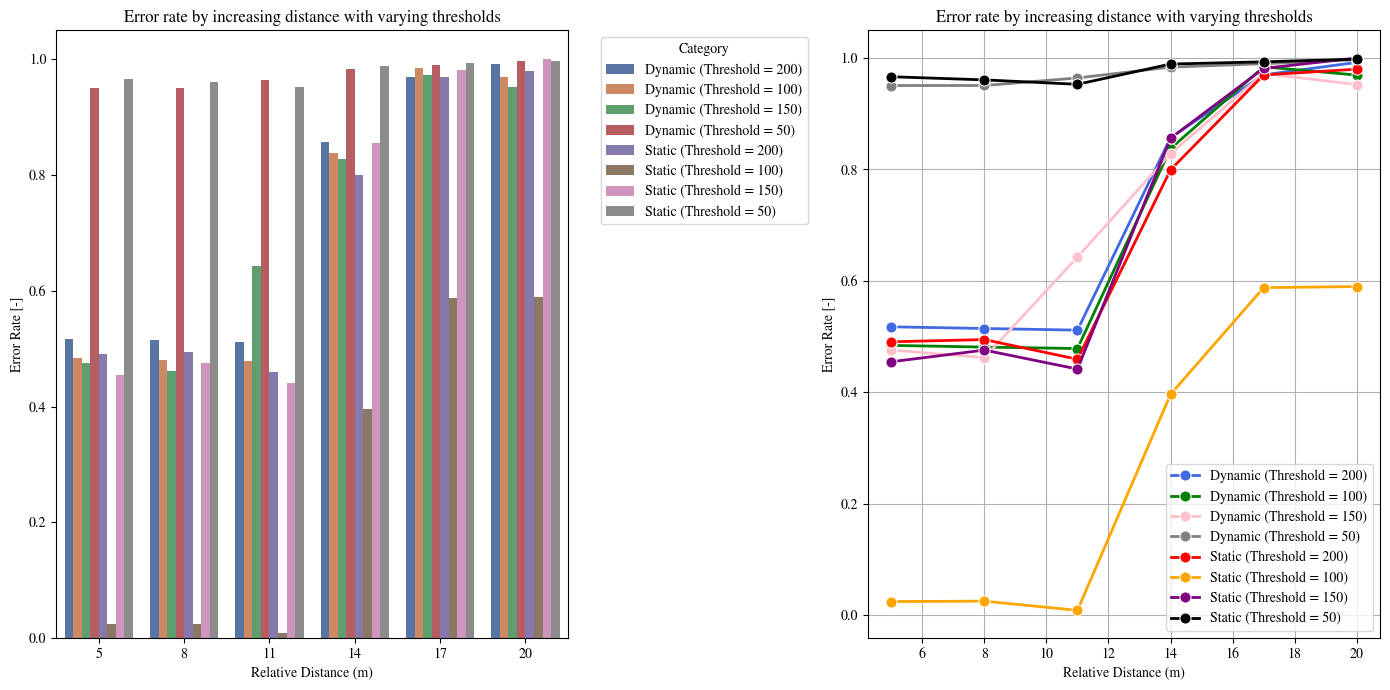

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set the font to a serif font, like Times New Roman
#mpl.rcParams['font.family'] = 'cmu_serif'
#mpl.rcParams['mathtext.fontset'] = 'cm'
# Alternatively, for LaTeX typesetting (for truly academic appearance)
#mpl.rcParams['text.usetex'] = True
#mpl.rcdefaults()
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'



# Add a new column to each DataFrame to label the category before combining
th_200_summary_dynamic['category'] = 'Dynamic (Threshold = 200)'
th_100_summary_dynamic['category'] = 'Dynamic (Threshold = 100)'
th_150_summary_dynamic['category'] = 'Dynamic (Threshold = 150)'
th_50_summary_dynamic['category'] = 'Dynamic (Threshold = 50)'
th_200_summary_static['category'] = 'Static (Threshold = 200)'
th_100_summary_static['category'] = 'Static (Threshold = 100)'
th_150_summary_static['category'] = 'Static (Threshold = 150)'
th_50_summary_static['category'] = 'Static (Threshold = 50)'

# Combine all the DataFrames into one
combined_data = pd.concat([
    th_200_summary_dynamic,
    th_100_summary_dynamic,
    th_150_summary_dynamic,
    th_50_summary_dynamic,
    th_200_summary_static,
    th_100_summary_static,
    th_150_summary_static,
    th_50_summary_static
])


plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)

# Adjusted barplot with hue
sns.barplot(data=combined_data, x='nearest_distance', y='error_rate', hue='category', palette='deep')

plt.title('Error rate by increasing distance with varying thresholds')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


""" # Bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=th_200_summary_dynamic, x='nearest_distance', y='error_rate', color='royalblue', label='Dynamic (Threshold = 200)')

#Include the threshold 100 data
sns.barplot(data=th_100_summary_dynamic, x='nearest_distance', y='error_rate', color='green', label='Dynamic (Threshold = 100)')

#Include the threshold 150 data
sns.barplot(data=th_150_summary_dynamic, x='nearest_distance', y='error_rate', color='pink', label='Dynamic (Threshold = 150)')

#Include the threshold 50 data
sns.barplot(data=th_50_summary_dynamic, x='nearest_distance', y='error_rate', color='gray', label='Dynamic (Threshold = 50)')

#Add the static data
sns.barplot(data=th_200_summary_static, x='nearest_distance', y='error_rate', color='red', label='Static (Threshold = 200)')

#Include the threshold 100 data
sns.barplot(data=th_100_summary_static, x='nearest_distance', y='error_rate', color='orange', label='Static (Threshold = 100)')

#Include the threshold 150 data
sns.barplot(data=th_150_summary_static, x='nearest_distance', y='error_rate', color='purple', label='Static (Threshold = 150)')

#Include the threshold 50 data
sns.barplot(data=th_50_summary_static, x='nearest_distance', y='error_rate', color='black', label='Static (Threshold = 50)')


plt.title('Error rate by increasing distance (Threshold = 200)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]') """

# Line plot
plt.subplot(1, 2, 2)
sns.lineplot(data=th_200_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='royalblue', linewidth=2, markersize=8, label='Dynamic (Threshold = 200)')

#Include the threshold 100 data
sns.lineplot(data=th_100_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='green', linewidth=2, markersize=8, label='Dynamic (Threshold = 100)')

#Include the threshold 150 data
sns.lineplot(data=th_150_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='pink', linewidth=2, markersize=8, label='Dynamic (Threshold = 150)')

#Include the threshold 50 data
sns.lineplot(data=th_50_summary_dynamic, x='nearest_distance', y='error_rate', marker='o', color='gray', linewidth=2, markersize=8, label='Dynamic (Threshold = 50)')

#Add the static data
sns.lineplot(data=th_200_summary_static, x='nearest_distance', y='error_rate', marker='o', color='red', linewidth=2, markersize=8, label='Static (Threshold = 200)')

#Include the threshold 100 data
sns.lineplot(data=th_100_summary_static, x='nearest_distance', y='error_rate', marker='o', color='orange', linewidth=2, markersize=8, label='Static (Threshold = 100)')

#Include the threshold 150 data
sns.lineplot(data=th_150_summary_static, x='nearest_distance', y='error_rate', marker='o', color='purple', linewidth=2, markersize=8, label='Static (Threshold = 150)')

#Include the threshold 50 data
sns.lineplot(data=th_50_summary_static, x='nearest_distance', y='error_rate', marker='o', color='black', linewidth=2, markersize=8, label='Static (Threshold = 50)')



plt.title('Error rate by increasing distance with varying thresholds')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
import numpy as np


# Specified relative distances
#specified_distances = np.array([5, 8, 11, 14, 17, 20])

# Assigning each data point to the nearest specified distance
#data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_x'].values).argmin(axis=0)]

# Summarizing the frequency of errors for these specified distances
specified_distance_summary = data.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})

specified_distance_summary

# Summarizing the frequency of errors for these specified distances
specified_distance_summary_static = data_static.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})

specified_distance_summary_static

,nearest_distance,total_entries,total_errors,error_rate
0,5,6150,3016,0.490407
1,8,6141,3036,0.494382
2,11,6163,2829,0.459030
3,14,6151,4916,0.799220
4,17,6142,5955,0.969554
5,20,6120,5997,0.979902


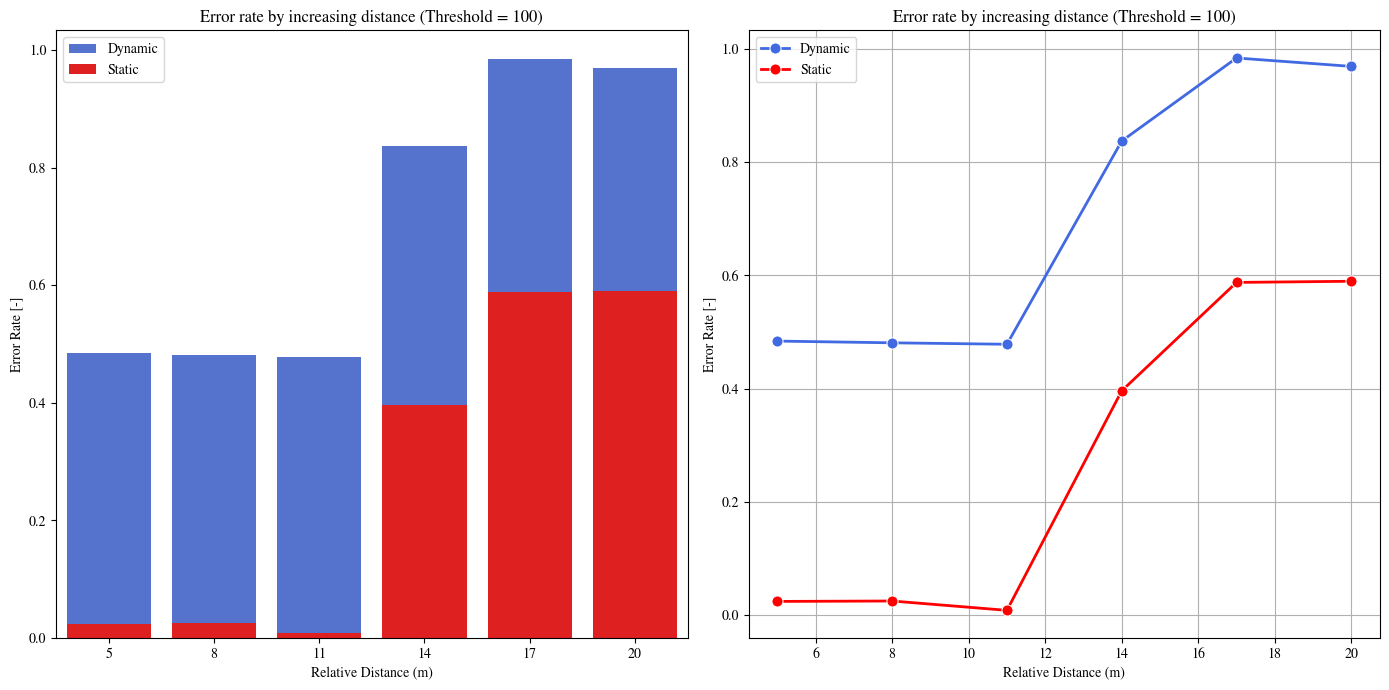

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set the font to a serif font, like Times New Roman
#mpl.rcParams['font.family'] = 'cmu_serif'
#mpl.rcParams['mathtext.fontset'] = 'cm'
# Alternatively, for LaTeX typesetting (for truly academic appearance)
#mpl.rcParams['text.usetex'] = True
#mpl.rcdefaults()
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.figure(figsize=(14, 7))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', color='royalblue', label='Dynamic')

#Add the static data
sns.barplot(data=specified_distance_summary_static, x='nearest_distance', y='error_rate', color='red', label='Static')
plt.title('Error rate by increasing distance (Threshold = 100)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')

# Line plot
plt.subplot(1, 2, 2)
sns.lineplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', marker='o', color='royalblue', linewidth=2, markersize=8, label='Dynamic')

#Add the static data
sns.lineplot(data=specified_distance_summary_static, x='nearest_distance', y='error_rate', marker='o', color='red', linewidth=2, markersize=8, label='Static')
plt.title('Error rate by increasing distance (Threshold = 100)')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.grid(True)

plt.tight_layout()
plt.show()

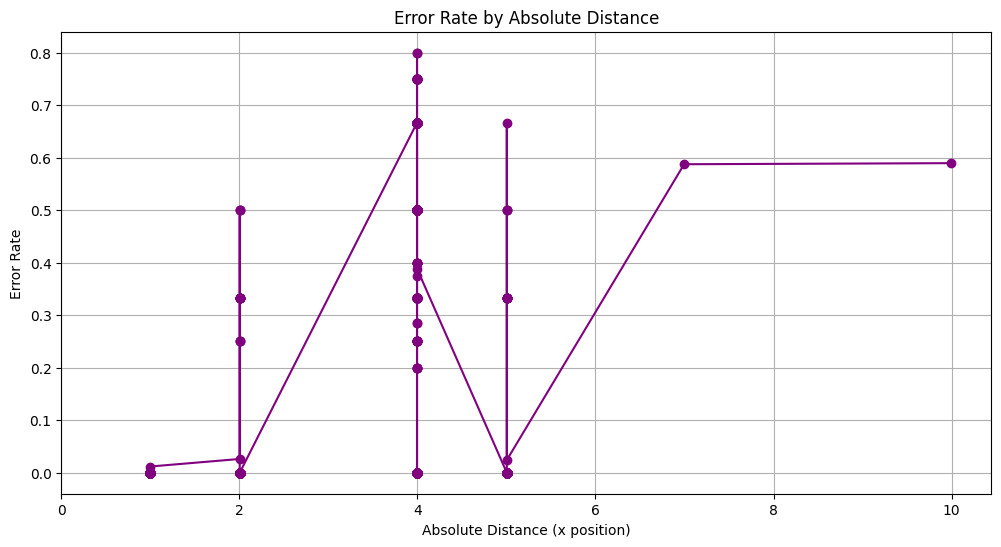

In [51]:
#Make all distances positive
import pandas as pd
import os

import matplotlib.pyplot as plt
data['distance_x'] = data['distance_x'].abs()

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_standard_static_cleaned.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path, data.head(50)  # Return the path to the new CSV and display the first few rows of the cleaned data.



error_rate_by_abs_distance = data.groupby('distance_x')['is_error'].mean().sort_index()
# Plot error rates with absolute distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_abs_distance.index, error_rate_by_abs_distance.values, marker='o', linestyle='-', color='purple')
plt.title('Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

In [47]:
data.head(50)  # Display the first few rows of the cleaned data.

,timestamp,distance_x,value,is_error,adjusted_distance_x
0,54.148,5.004249,0.0,0,10.004249
1,54.148,5.004249,3.0,0,10.004249
2,54.152,5.004249,2.0,0,10.004249
3,54.164,5.004249,2.0,0,10.004249
4,54.168,5.004249,0.0,0,10.004249
5,54.168,5.004249,3.0,0,10.004249
6,54.180,5.004249,0.0,0,10.004249
7,54.180,5.004249,2.0,0,10.004249
8,54.184,5.004249,3.0,0,10.004249
9,54.196,5.004249,2.0,0,10.004249


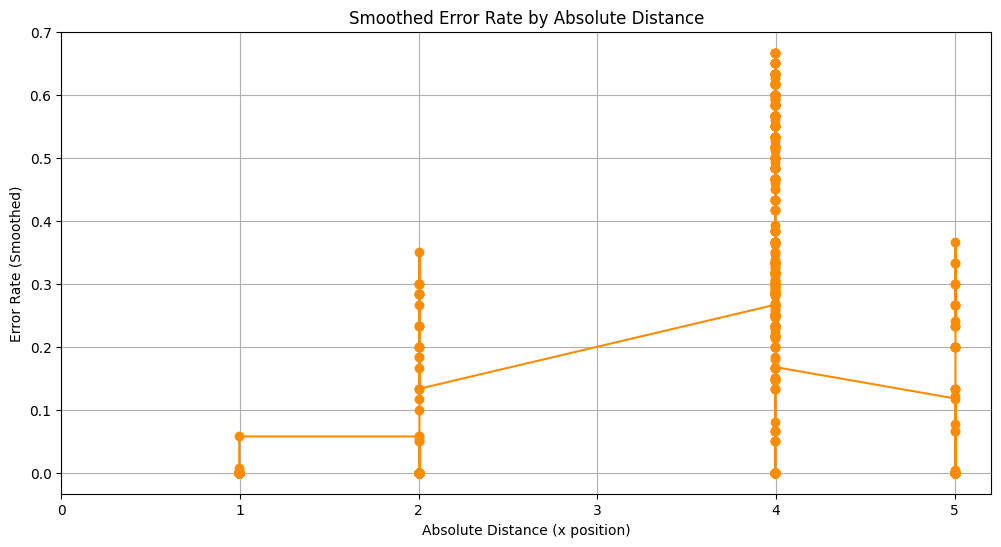

In [45]:
# Apply a moving average to smooth the data and reduce spikes
# Choosing a window size that balances smoothness with retaining the underlying trend
window_size = 5
smoothed_error_rate_abs = error_rate_by_abs_distance.rolling(window=window_size, center=True).mean()

# Plot the smoothed error rates against absolute distances
plt.figure(figsize=(12, 6))
plt.plot(smoothed_error_rate_abs.index, smoothed_error_rate_abs.values, marker='o', linestyle='-', color='darkorange')
plt.title('Smoothed Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate (Smoothed)')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

0.9957509721555614


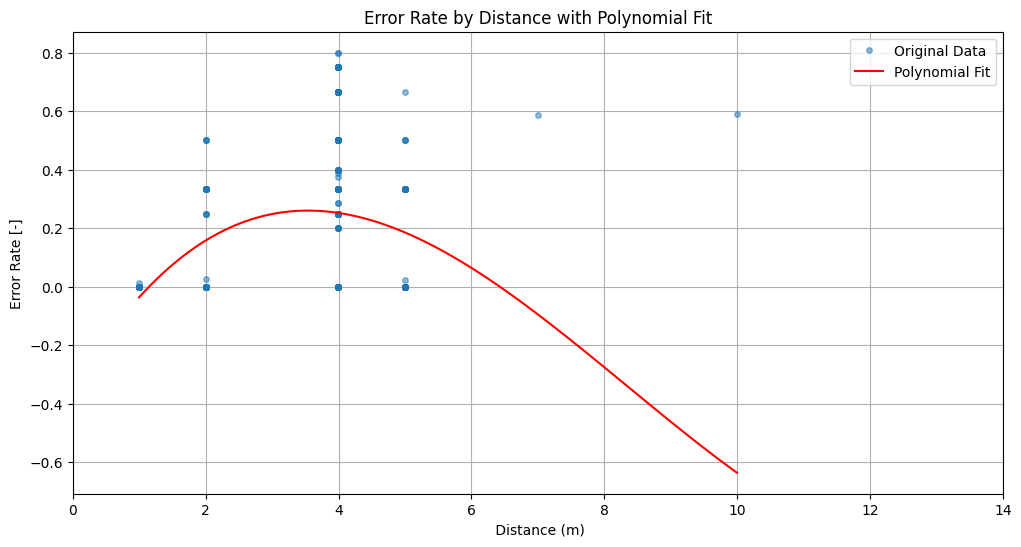

In [62]:
from numpy import polyfit, poly1d
import numpy as np


data['adjusted_distance_x'] = data['distance_x'] + 0
# Recalculate error rates with the adjusted distances
error_rate_by_adjusted_distance = data.groupby('adjusted_distance_x')['is_error'].mean().sort_index()

left_bound = error_rate_by_adjusted_distance.index.min()
print(left_bound)


# Fit a polynomial regression to the adjusted data
coef_adjusted = polyfit(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 3)
poly_adjusted = poly1d(coef_adjusted)

# Generate x and y values for the polynomial fit over the adjusted distances
x_poly_adjusted = np.linspace(error_rate_by_adjusted_distance.index.min(), error_rate_by_adjusted_distance.index.max(), 100)
y_poly_adjusted = poly_adjusted(x_poly_adjusted)

# Plot the original data and the polynomial regression line with adjusted distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 'o', markersize=4, alpha=0.5, label='Original Data')
plt.plot(x_poly_adjusted, y_poly_adjusted, 'r-', label='Polynomial Fit')
plt.title('Error Rate by Distance with Polynomial Fit')
plt.xlabel(' Distance (m)')
plt.ylabel('Error Rate [-]')
plt.legend()
plt.grid(True)
plt.xlim(left_bound)  # Adjust the left bound to reflect the distance adjustment
#More descriptive x-limit
plt.xlim(left=0, right=14)
plt.show()

